# Biomedical Image Analysis in Python
The field of biomedical imaging has exploded in recent years - but for the uninitiated, even loading data can be a challenge! In this introductory course, you'll learn the fundamentals of image analysis using NumPy, SciPy, and Matplotlib. You'll navigate through a whole-body CT scan, segment a cardiac MRI time series, and determine whether Alzheimer’s disease changes brain structure. Even if you have never worked with images before, you will finish the course with a solid toolkit for entering this dynamic field.

**Instructor:** Stephen Bailey is lead data scientist at Immuta, where he researches and develops best practices in data governance. He is passionate about democratizing science and is an enthusiastic member of the Python community. Stephen has published a number of papers on leveraging medical imaging technology to better understand health and disease, and he is excited to introduce others to this dynamic research field!

# $\star$ Chapter 1: Exploration
Prepare to conquer the Nth dimension! To begin the course, you'll learn how to load, build and navigate N-dimensional images using a CT image of the human chest. You'll also leverage the useful ImageIO package and hone your NumPy and matplotlib skills.

### Image data
   Since the first X-ray in 1895, medical imaging technology has advanced clinical care and opened up new fields of scientific investigation. The amount of imaging data is exploding: by 2020, there is estimated to be more than 3.5 billion terabytes of imaging data in the U.S. alone. This has created amazing opportunities for analysis: 
   * Measuring organ shape and size
   * Creating detailed reconstructions of anatomy
   * Analyzing tissue composition
   * Predicting pathology
   * Much, much more...
   The complexity and variety of the data can make it an intimidating field to jump into. Fortunately, there are fantastic tools and a wealth of resources to support you. 
  
#### Toolbox
* `ImageIO`
* `NumPy`
* `SciPy`
* `matplotlib`

#### Course Objectives

* **1) Exploration**
    * Loading images
    * N-D data
    * Subplots
    
* **2) Masks and Filters**
    * Intensity distributions
    * Convolutions
    * Edge detection
    
* **3) Measurement**
    * Labelling
    * Multi-object measurement
    * Morphology
    
* **4) Image Comparison**
    * Transformations
    * Resampling
    * Cost functions
    * Normalization
    
* While this only scratches the surface of the field, it will give you a firm foundation for advanced concepts like classification and segmentation.

### Loading images

#### `imageio`
* read and save images with `imread`

```
import imagio
im = imagio.imread('body-001.dcm')
```
   * One useful feature of `imageio` is that it can read **DICOM files, the standard format for human medical imaging.**
   * See here for more information on [DICOM images](https://en.wikipedia.org/wiki/DICOM)
   * The data is read in as an **image object**, which is a type of NumPy array.
* To access specific values from your image, you can slice out a single value or a range of index values along each dimension
    * Slice the array by specifying values along each available dimension
    
```
im[0, 0]
im[0:2, 0:2]
```

### Metadata
* Images are always acquired in a specific context; this information is often referred to as **metadata**.
* **Metadata:** the who, what, when, where, and how of image acquisition
* `imagio` loads available metadata into a dictionary, accessible through the `meta` attribute
* **`image.meta`**
* This is especially important for **DICOM** files, which contain a lot of patient and acquisition information
* Since `meta` is a Python dictionary, you can access specific information by indexing it with one of the available keys.
* **You can also call the `keys()` method to list all of the available metadata.**
    * `image.meta.keys()`
    
#### Plotting images
* Visualization is fundamental to image analysis, and we'll rely heavily on matplotlib and its `imshow()` function throughout this course.


In [51]:
import numpy as np
import scipy
import imageio
from imageio import imread
import matplotlib.pyplot as plt
from pprint import pprint

plt.rcParams['figure.figsize'] = (10, 8)

In [23]:
def show_image(image, title='Image', cmap_type='gray'):
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')
    plt.show()

* `plt.imshow(im, cmap='gray')
* If the image does not have color, add `cmap='gray'` to plot it in grayscale
* Many colormaps available but often shown in grayscale (`cmap='gray')
* **To reduce clutter, it's common to turn off the axis ticks, labels, and frame with `plt.axis('off')`**
* Finally, call `plt.show()` per usual to render the image. 

#### Loading Images Exercises
In this chapter, we'll work with sections of a [computed tomography (CT) scan](https://en.wikipedia.org/wiki/CT_scan) from [The Cancer Imaging Archive](https://www.cancerimagingarchive.net/about-the-cancer-imaging-archive-tcia/) . CT uses a rotating X-ray tube to create a 3D image of the target area.

The actual content of the image depends on the instrument used: photographs measure visible light, x-ray and CT measure radiation absorbance, and MRI scanners measure magnetic fields.

To warm up, use the `imageio` package to load a single DICOM image from the scan volume and check out a few of its attributes.

```
# Import ImageIO
import imageio

# Load "chest-220.dcm"
im = imread('chest-220.dcm')

# Print image attributes
print('Image type:', type(im))
print('Shape of image array:', im.shape)
```

`imageio` is a versatile package. It can read in a variety of image data, including JPEG, PNG, and TIFF. But it's especially useful for its ability to handle DICOM files.

In [10]:
im_png = imread('pics_b/chest_01.png')
print('Image type:', type(im_png))
print('Shape of image array:', im_png.shape)

Image type: <class 'imageio.core.util.Array'>
Shape of image array: (1246, 1244, 4)


In [11]:
im = imread('tcia-chest-ct-sample/chest-220.dcm')
print('Image type:', type(im))
print('Shape of image array:', im.shape)

Image type: <class 'imageio.core.util.Array'>
Shape of image array: (512, 512)


### Metadata
`imagio` reads in data as `Image` objects. These are standard `NumPy` arrays with a dictionary of metadata.

Metadata can be quite rich in medical images and can include:
    * **Patient demographics:** name, age, sex, clinical information
    * **Acquisition information:** image shape, sampling rates, data type, [modality](https://en.wikipedia.org/wiki/Medical_imaging#Imaging_modalities) (such as X_Ray, CT, or MRI)
    
Start this exercise by reading in the chest image and listing the available fields in the `meta` dictionary.

In [12]:
print(im.meta.keys())

odict_keys(['TransferSyntaxUID', 'SOPClassUID', 'SOPInstanceUID', 'StudyDate', 'SeriesDate', 'ContentDate', 'StudyTime', 'SeriesTime', 'ContentTime', 'Modality', 'Manufacturer', 'StudyDescription', 'SeriesDescription', 'PatientName', 'PatientID', 'PatientBirthDate', 'PatientSex', 'PatientWeight', 'StudyInstanceUID', 'SeriesInstanceUID', 'SeriesNumber', 'AcquisitionNumber', 'InstanceNumber', 'ImagePositionPatient', 'ImageOrientationPatient', 'SamplesPerPixel', 'Rows', 'Columns', 'PixelSpacing', 'BitsAllocated', 'BitsStored', 'HighBit', 'PixelRepresentation', 'RescaleIntercept', 'RescaleSlope', 'PixelData', 'shape', 'sampling'])


In [13]:
print(im.meta)

Dict([('TransferSyntaxUID', '1.2.840.10008.1.2'), ('SOPClassUID', '1.2.840.10008.5.1.4.1.1.2'), ('SOPInstanceUID', '1.3.6.1.4.1.14519.5.2.1.5168.1900.290866807370146801046392918286'), ('StudyDate', '20040529'), ('SeriesDate', '20040515'), ('ContentDate', '20040515'), ('StudyTime', '115208'), ('SeriesTime', '115254'), ('ContentTime', '115325'), ('Modality', 'CT'), ('Manufacturer', 'GE MEDICAL SYSTEMS'), ('StudyDescription', 'PET CT with registered MR'), ('SeriesDescription', 'CT IMAGES - RESEARCH'), ('PatientName', 'STS_007'), ('PatientID', 'STS_007'), ('PatientBirthDate', ''), ('PatientSex', 'F '), ('PatientWeight', 82.0), ('StudyInstanceUID', '1.3.6.1.4.1.14519.5.2.1.5168.1900.381397737790414481604846607090'), ('SeriesInstanceUID', '1.3.6.1.4.1.14519.5.2.1.5168.1900.315477836840324582280843038439'), ('SeriesNumber', 2), ('AcquisitionNumber', 1), ('InstanceNumber', 57), ('ImagePositionPatient', (-250.0, -250.0, -180.62)), ('ImageOrientationPatient', (1.0, 0.0, 0.0, 0.0, 1.0, 0.0)), ('S

In [17]:
print(im.meta.Modality)
print(im.meta.sampling)
print(im.meta.PatientSex)
print(im.meta.StudyDate)

CT
(0.976562, 0.976562)
F 
20040529


DICOM files have rich information related to patient and acquisition information, but other image formats can have helpful information as well.

#### Plot images
Perhaps the most critical principle of image analysis is: **look at your images!**

Matplotlib's `imshow()` function gives you a simple way to do this. Knowing a few simple arguments will help:

* **`cmap`** controls the color mappings for each value. The "gray" colormap is common, but [many others are available](https://matplotlib.org/2.0.2/users/colormaps.html).
* **`vmin`** and **`vmax`** control the color contrast between values. Changing these can reduce the influence of extreme values.
* **`plt.axis('off')`** removes axis and tick labels from the image.

For this exercise, plot the CT scan and investigate the effect of a few different parameters.

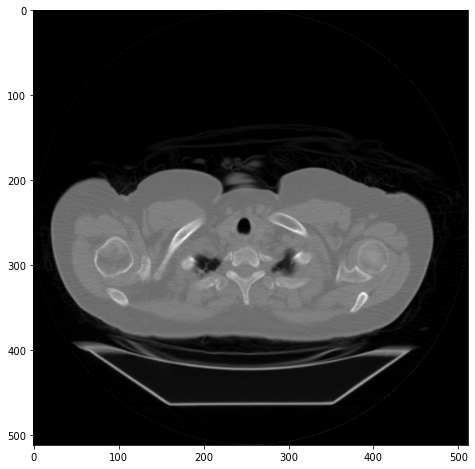

In [18]:
# Draw the image in grayscale
plt.imshow(im, cmap='gray')

# Render the image
plt.show()

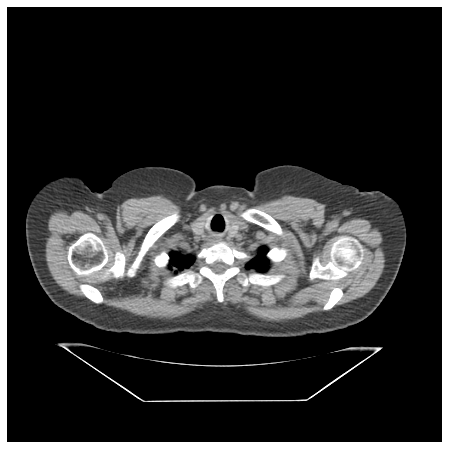

In [22]:
# Draw the image with greater contrast
plt.imshow(im, vmin=-200, vmax=200, cmap='gray')
plt.axis('off')
# Render the image
plt.show()

## N-dimensional images
* Now that we've loaded and plotted 2-D images, let's discuss higher dimensional datasets.
* Images come in all shapes and sizes, making them versatile, but also complex.
* A standard grayscale image is the simplest type of image: it's and array that can be indexed by rows and columns: `im[row, col]`

#### 3D images
* **3D images cover a volume of space, rather than just a single plane:**
    * **`vol[pln, row, col]`**
* This volumetric data is useful because it can better capture the complexities of the human body, but it can be difficult to visualize because it can't be summarized in a single plot.

#### Color images
* Color images are also three-dimensional
* RGB images, for example, have three color channels that, when rendered by `matplotlib` or other image viewers, express a wide range of colors.

#### Time series data (movies)
* **Movies, or time series data include a temporal dimension, show how each element changes over time:** 
    * **`im_ts[time, row, col, ch]`**
* Like the planar dimension for 3D volumes, the temporal dimension is put first by convention.

## N-dimensional images are stacks of arrays 
* Just as a 2D image is a stack of 1-dimensional vectors, **3D, 4D, and even higher dimensional images can be thought of as stacks of simpler ones.**

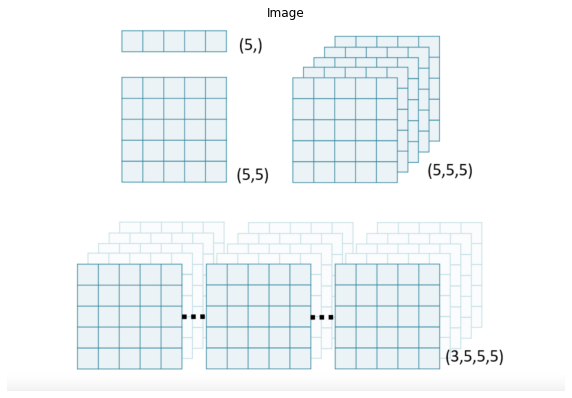

In [25]:
stacked_arrays = imread('pics_b/stacked_arrays_im.png')
show_image(stacked_arrays)

* Shape, sampling and field of view
    * Image shape: number of elements along each axis
    * Sampling rate: physical space covered by each element
    * Field of view: physical space covered along each axis
* **Image stacks:** Image "stacks" are a useful metaphor for understanding multi-dimensional data. Each higher dimension is a stack of lower dimensional arrays.

```
import imageio
import numpy as np
im1 = imageio.imread('chest-000.dcm')
im2 = imageio.imread('chest-001.dcm')
im3 = imageio.imread('chest-002.dcm')
im1.shape
```
* `(512, 512)`

```
vol = np.stack([im1, im2, im3])
vol.shape
```
* `(3, 512, 512)`

* If we look at our new `vol` array, we see that it contains a third dimension with three elements along it, but the row and column dimensions are the same as before.

#### Loading volumes directly
* **`imageio.volread()`:**
* Reads multi-dimensional data directly from disk, whether your images are stored in their own folder, or if the dataset is already multi-dimensional.
* Assembles a volumne from multiple images


In the following example, we have a folder named `chest-data`, which contains 50 slices of a 3D volumne:

```
import os
os.listdir('chest-data')
```
* output:

```
['chest-000.dcm',
'chest-001.dcm',
'chest-002.dcm',
...,
'chest-049.dcm']
```
* We simply have to pass the folder name to `volread()`, and it will assemble the volume for us.

```
import imageio
vol = imageio.volread('chest-data')
```
* **Since these are DICOM images, the function actually checks the available metadata to make sure that the images are placed in the correct order!**
    * Otherwise, it will default to **alphabetical order.**

```
vol.shape
```
`output:`

```
(50, 512, 512)
```
* Displaying the shape attribute shows us that we have 50 images stacked together 

### Shape, sampling, and field of view
* When analyzing images, keep in mind that the data is only a representation of real, physical space.
* The information in your images is limited to the number of elements in it: this is known as the **array shape** in NumPy and is always available as an attribute
* **Image shape:** number of elements along each axis.
* **Sampling rate:** the amount of physical space covered by each element; can vary along each dimension
    * For DICOM images, the sampling rate is usually encoded in the metadata
    * For other types of formats such as JPEG and PNG, you may need to find it elsewhere.
* **Field of view:** Physical space covered along each axis
    * It is the product of the shape and sampling rate

#### Image shape
```
import imageio
vol = imageio.volread('chest-data')

# Image shape (in voxels)
n0, n1, n2 = vol.shape
print(n0, n1, n2)
```
* Output: `(50, 512, 512)`

#### Sampling rate
```
# Sampling rate (in mm)
d0, d1, d2 = vol.meta['sampling']
d0, d1, d2
```
* Output: `(2, 0.5, 0.5)`

#### Field of view

```
#Field of view (in mm)
n0 * d0, n1 * d1, n2 * d2
```
* Output: `(100, 256, 256)`

#### Stack images
Image "stacks" are a useful metaphor for understanding multi-dimensional data. Each higher dimension is a stack of lower dimensional arrays.

In this exercise, we will use NumPy's `stack()` function to combine several 2D arrays into a 3D volume. [By convention](https://scikit-image.org/docs/dev/user_guide/numpy_images.html#numpy-images-coordinate-conventions), volumetric data should be stacked along the first dimension: `vol[plane, row, col]`.

Note: performing any operations on an ImageIO `Image` object will convert it to a `numpy.ndarray`, stripping its metadata.



In [28]:
# Import ImageIO and NumPy
#import imageio
#import numpy as np

# Read in each 2D image
im1 = imageio.imread('tcia-chest-ct-sample/chest-220.dcm')
im2 = imageio.imread('tcia-chest-ct-sample/chest-221.dcm')
im3 = imageio.imread('tcia-chest-ct-sample/chest-222.dcm')

# Stack images into a volume
vol = np.stack([im1, im2, im3], axis=0)
print('Volume dimensions:', vol.shape)

Volume dimensions: (3, 512, 512)


### Load volumes
ImageIO's `volread()` function can load multi-dimensional datasets and create 3D volumes from a folder of images. It can also aggregate metadata across these multiple images.

For this exercise, read in an entire volume of brain data from the `"tcia-chest-ct" `folder, which contains 25 DICOM images.

```
import imageio

# Load the "tcia-chest-ct" directory
vol = imageio.volread("tcia-chest-ct")

# Print image attributes
print('Available metadata:', vol.meta.keys())
print('Shape of image array:', vol.shape)
```

In [29]:
#import imageio

# Load the "tcia-chest-ct" directory
vol = imageio.volread("tcia-chest-ct-sample")

# Print image attributes
print('Available metadata:', vol.meta.keys())
print('Shape of image array:', vol.shape)

Reading DICOM (examining files): 1/5 files (20.0%5/5 files (100.0%)
  Found 1 correct series.
Reading DICOM (loading data): 5/5  (100.0%)
Available metadata: odict_keys(['TransferSyntaxUID', 'SOPClassUID', 'SOPInstanceUID', 'StudyDate', 'SeriesDate', 'ContentDate', 'StudyTime', 'SeriesTime', 'ContentTime', 'Modality', 'Manufacturer', 'StudyDescription', 'SeriesDescription', 'PatientName', 'PatientID', 'PatientBirthDate', 'PatientSex', 'PatientWeight', 'StudyInstanceUID', 'SeriesInstanceUID', 'SeriesNumber', 'AcquisitionNumber', 'InstanceNumber', 'ImagePositionPatient', 'ImageOrientationPatient', 'SamplesPerPixel', 'Rows', 'Columns', 'PixelSpacing', 'BitsAllocated', 'BitsStored', 'HighBit', 'PixelRepresentation', 'RescaleIntercept', 'RescaleSlope', 'PixelData', 'shape', 'sampling'])
Shape of image array: (5, 512, 512)


### Field of view
The amount of physical space covered by an image is its **field of view**, which is calculated from two properties:

* **Array shape** the number of data elements on each axis. Can be accessed with the `shape` attribute.
* **Sampling resolution** the amount of physical space covered by each pixel. Sometimes available in metadata (e.g., `meta['sampling']`).

For this exercise, multiply the array shape and sampling resolution along each axis to calculate the field of view of `vol`. All values are in millimeters.

In [35]:
array_shape = vol.shape

In [30]:
print(vol.shape)

(5, 512, 512)


In [34]:
sampling_rate = vol.meta.sampling

In [31]:
print(vol.meta['sampling'])

(3.269999999999996, 0.976562, 0.976562)


In [32]:
print(vol.meta.sampling)

(3.269999999999996, 0.976562, 0.976562)


In [37]:
print(array_shape[0] * sampling_rate[0], array_shape[1] * sampling_rate[1], array_shape[2] * sampling_rate[2])

16.34999999999998 499.999744 499.999744


**ANSWER:** The field of view is (16, 500, 500)

## Advanced Plotting
* Efficiently and comprehensively visualizing your data is key to successful image analysis.

#### To plot N-dimensional data, slice it!
* Similar to slicing a 3-D loaf of bread into 2-D (ish) planes.
* The concept for 3-D images is the same: to explore your multidimensional array, you must visualize many simpler slices of it

#### Plotting multiple images at once
* It's inefficient to plot each of these slices one by one
* A better way is to display many at once.
* To do this, we'll leverage pyplot's `subplots()` function, which creates a grid of axis objectts based on the number of rows and columns you specify
* **`plt.subplots`:** creates a figure canvas with multiple `AxesSubplots` objects
* When you call `pyplot.subplots()`, it returns a figure object and an array of axis handles

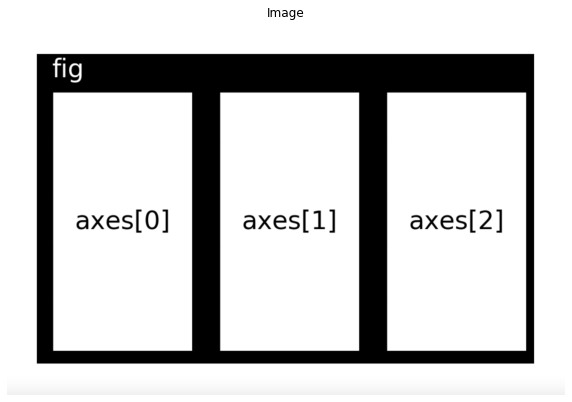

In [44]:
show_image(imread('pics_b/fig_ax_image.png'))

* In the case below, the axes array has a shape of 1 by 3
* To draw images on each subplot, we will call the `imshow()` function directly from the axis object, rather than calling it through `pyplot`.
* Here, we're plotting the first slice of vol with a gray colormap
* After the first slice is drawn, we repeat the process for the other slices
    * **If you had many images to draw, you could also inster the drawing step into a for loop as well.**
* Finally, we can clean up and render the figure (turn off tick and labels with `plt.axis('off')`

```
import imageio
vol = imageio.volread('chest-data')
fig, axes = plt.subplots(nrows=1, ncols=3)
axes[0].imshow(vol[0], cmap= 'gray')
axes[1].imshow(vol[10], cmap='gray')
axes[2].imshow(vol[20], cmap='gray')
for ax in axes:
    ax.axis('off')
plt.show()
```
* We finish by rendering the sequence of images with `plt.show()` and are greeted with a nice set of images that move sequentially through the chest volume.

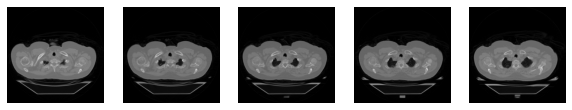

In [45]:
#import imageio
#vol = imageio.volread('chest-data')
fig, axes = plt.subplots(nrows=1, ncols=5)
axes[0].imshow(vol[0], cmap= 'gray')
axes[1].imshow(vol[1], cmap='gray')
axes[2].imshow(vol[2], cmap='gray')
axes[3].imshow(vol[3], cmap='gray')
axes[4].imshow(vol[4], cmap='gray')
for ax in axes:
    ax.axis('off')
plt.show()

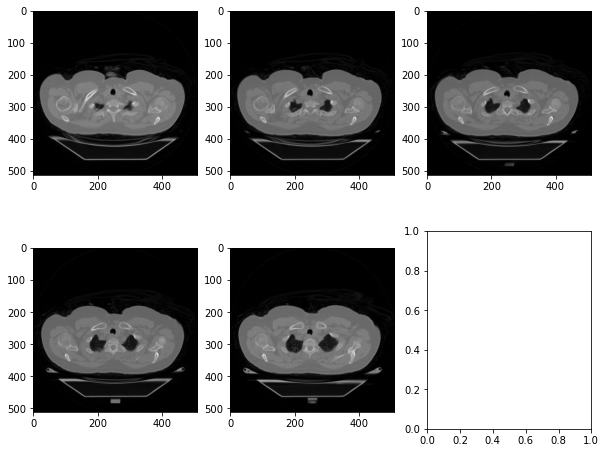

In [47]:
fig, axes = plt.subplots(nrows=2, ncols=3)
axes[0,0].imshow(vol[0], cmap= 'gray')
axes[0,1].imshow(vol[1], cmap='gray')
axes[0,2].imshow(vol[2], cmap='gray')
axes[1,0].imshow(vol[3], cmap='gray')
axes[1,1].imshow(vol[4], cmap='gray')
#for ax in axes:
    #ax.axis('off')
plt.show()

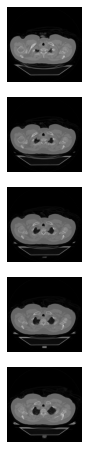

In [49]:
fig, axes = plt.subplots(nrows=5, ncols=1)
axes[0].imshow(vol[0], cmap= 'gray')
axes[1].imshow(vol[1], cmap='gray')
axes[2].imshow(vol[2], cmap='gray')
axes[3].imshow(vol[3], cmap='gray')
axes[4].imshow(vol[4], cmap='gray')
for ax in axes:
    ax.axis('off')
plt.show()

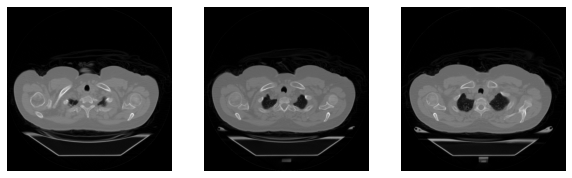

In [52]:
fig, axes = plt.subplots(nrows=1, ncols=3)
axes[0].imshow(vol[0], cmap= 'gray')
axes[1].imshow(vol[2], cmap='gray')
axes[2].imshow(vol[4], cmap='gray')
for ax in axes:
    ax.axis('off')
plt.show()